In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('realestate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [4]:
df.drop('No',inplace=True,axis=1)
df.drop('X1 transaction date',inplace=True,axis=1)

In [5]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df=df.rename(columns={'X2 house age':'Age',
                    'X3 distance to the nearest MRT station':"MRT distance",
                    'X4 number of convenience stores':'Stores',
                    'X5 latitude':'Latitude',
                    'X6 longitude':'Longitude',
                    'Y house price of unit area':'Price'
                   })

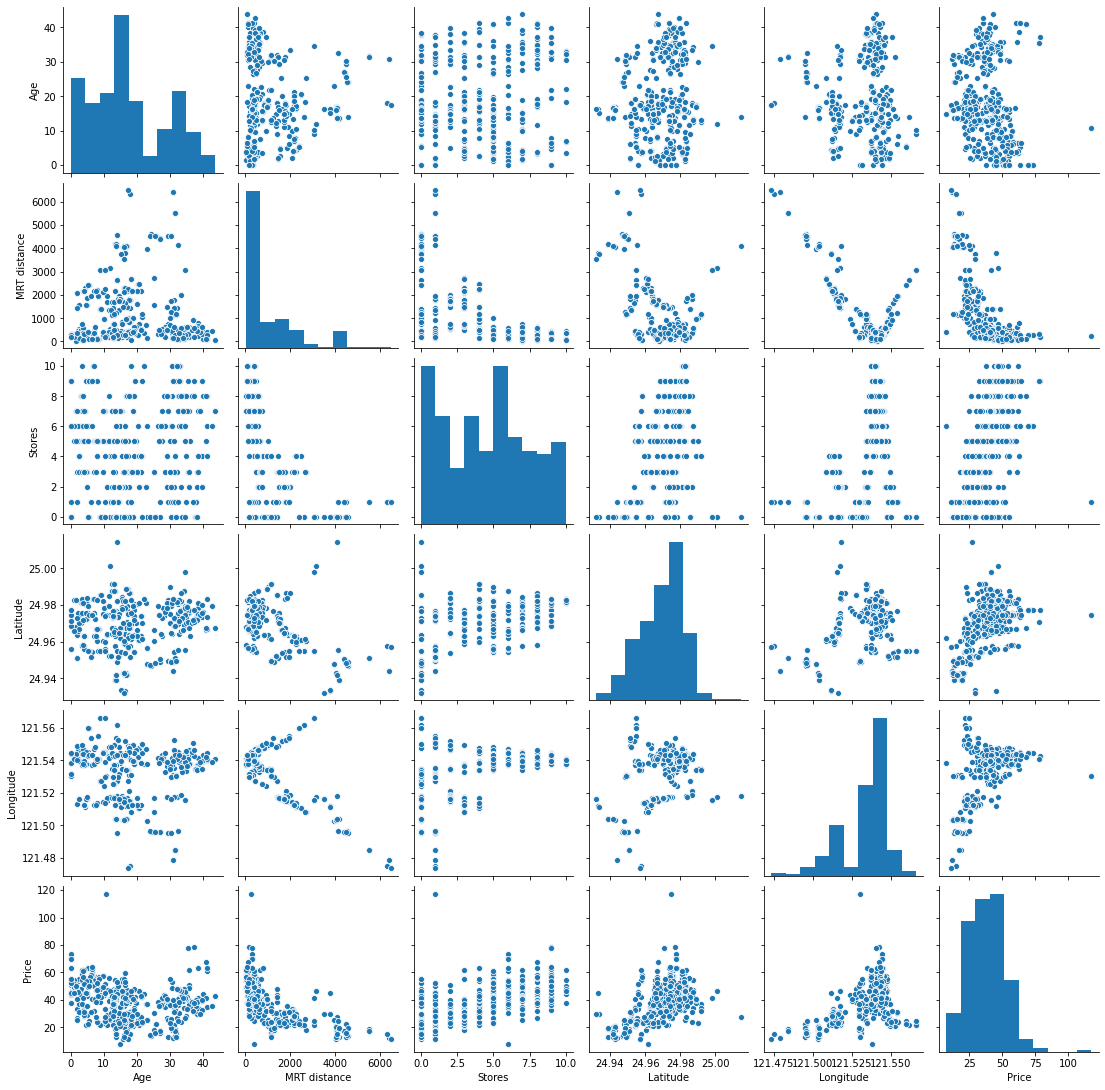

In [7]:
sns.pairplot(df,kind='scatter')

In [8]:
x=df.drop('Price',axis=1)
y=df['Price']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.17, random_state=80)

In [10]:
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

X_train:  (343, 5)
y_train:  (343,)
X_test:  (71, 5)
y_test:  (71,)


In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
print(f"Intercerpt:{reg.intercept_}")
print(f"Coefficent:{reg.coef_}")

Intercerpt:-3712.787116677399
Coefficent:[-2.70131093e-01 -4.37748412e-03  1.17213907e+00  2.20221793e+02
 -1.43430961e+01]


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.7608486475719439

In [15]:
# hypothesis equation
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -3712.79 + -0.27*X1 -0.00*X2 1.17*X3 + 220.22*X4 + -14.34*X5
